<a href="https://colab.research.google.com/github/Sudarchanan/MachineLearning/blob/main/linearRegression_GradientDescent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

dataset_file = "/content/drive/MyDrive/HousingData.csv"
df = pd.read_csv(dataset_file)
print(df.head())


      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622    3  222     18.7   

        B  LSTAT  MEDV  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90    NaN  36.2  


In [2]:
df.shape

(506, 14)

In [3]:
df.describe()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560263,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [4]:
df.isna().sum()

,0
CRIM,20
ZN,20
INDUS,20
CHAS,20
NOX,0
RM,0
AGE,20
DIS,0
RAD,0
TAX,0


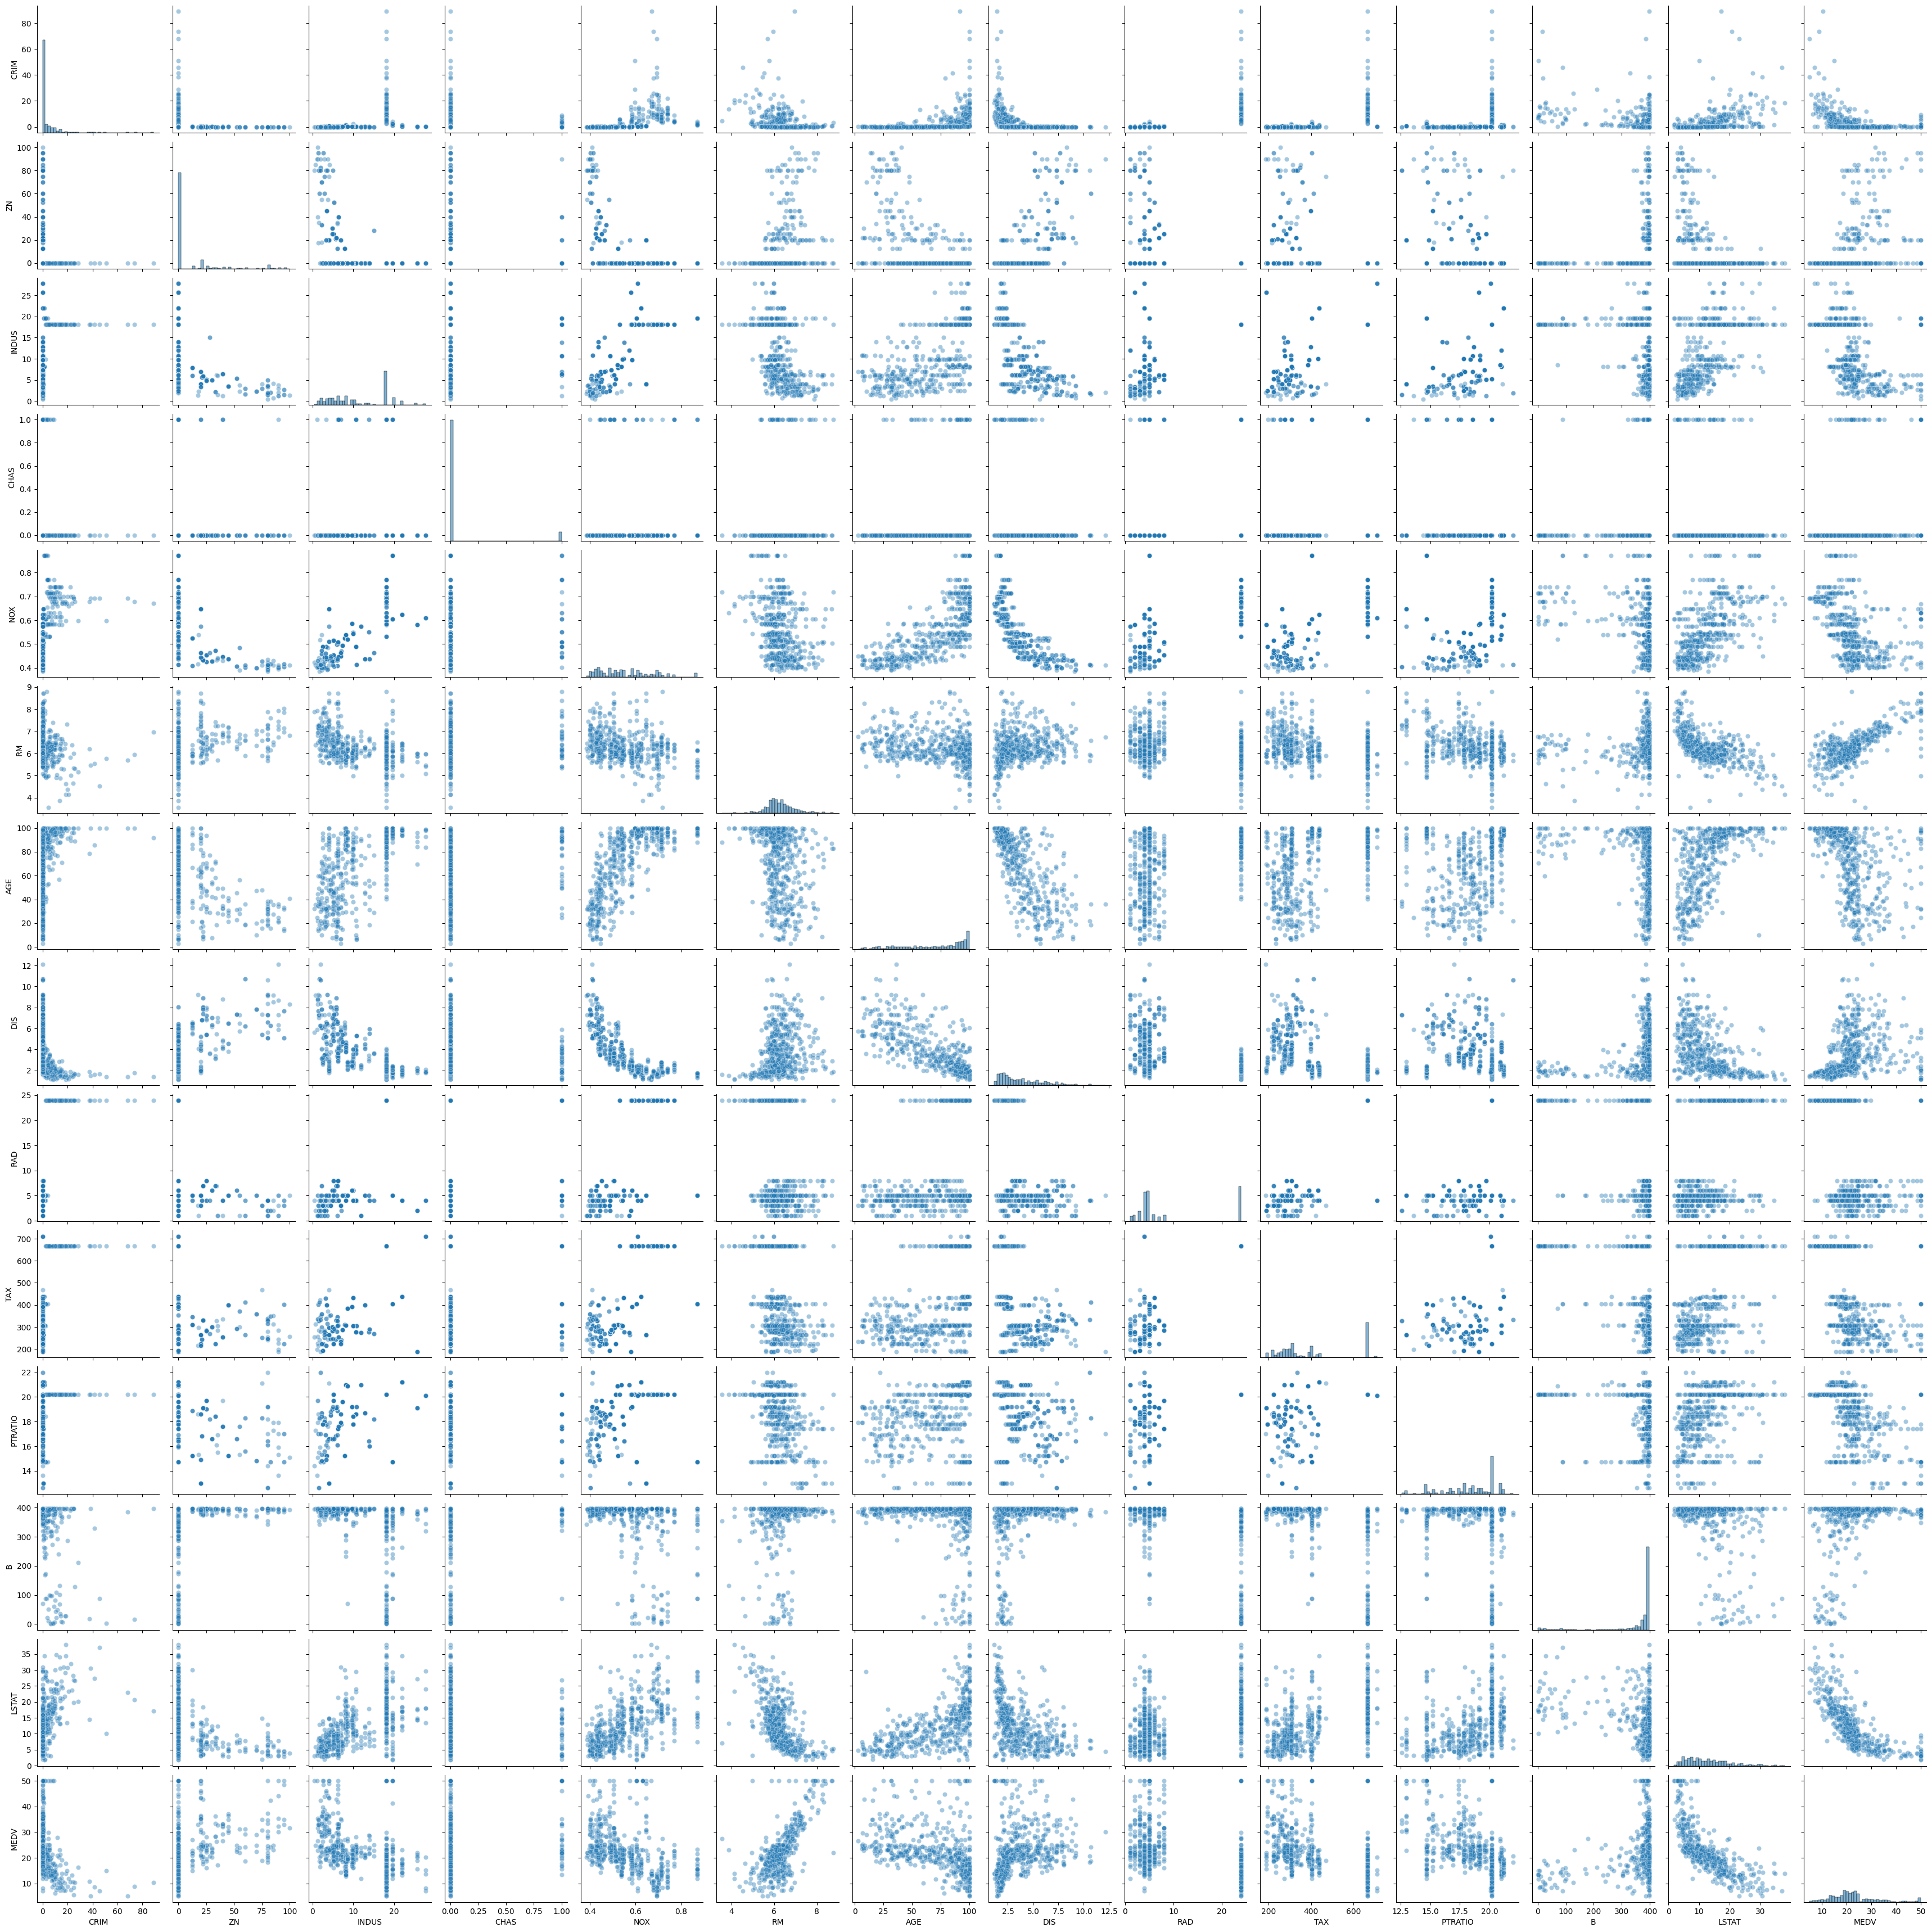

In [5]:
import seaborn as sns

sns.pairplot(df,
             kind='scatter',
             plot_kws={'alpha':0.4},
             diag_kws={'alpha':0.55, 'bins':40})

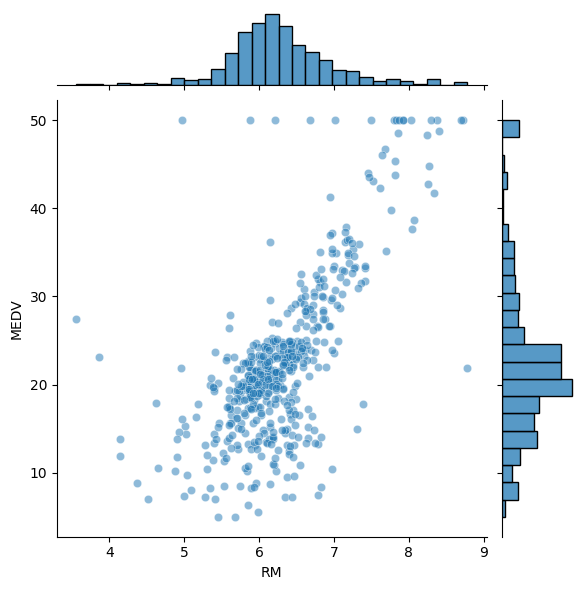

In [6]:
sns.jointplot(x='RM', y='MEDV', data=df, alpha=0.5)


In [7]:
x=df['RM']
x.head()


,RM
0,6.575
1,6.421
2,7.185
3,6.998
4,7.147


In [8]:
y=df['MEDV']
y.head()

,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
print("X Train:")
print(x_train)
print("y Train:")
print(y_train)


X Train:
220    6.951
71     5.961
240    6.897
6      6.012
417    5.304
       ...  
323    5.708
192    7.178
117    6.021
47     6.030
172    5.572
Name: RM, Length: 404, dtype: float64
y Train:
220    26.7
71     21.7
240    22.0
6      22.9
417    10.4
       ... 
323    18.5
192    36.4
117    19.2
47     16.6
172    23.1
Name: MEDV, Length: 404, dtype: float64


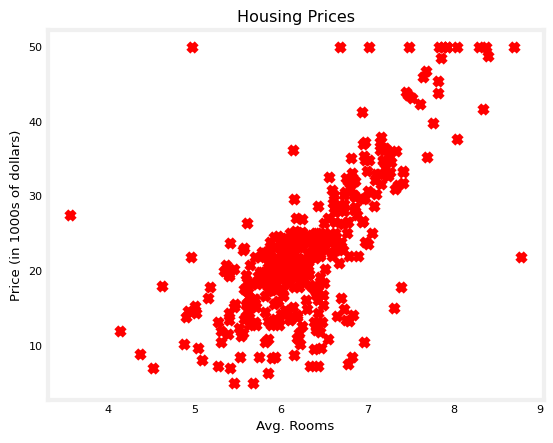

In [10]:
import matplotlib.pyplot as plt
plt.style.use("/content/drive/MyDrive/deeplearning.mplstyle")


# Plot the data points
plt.scatter(x_train, y_train, marker='x', c='r')
# Set the title
plt.title("Housing Prices")
# Set the y-axis label
plt.ylabel('Price (in 1000s of dollars)')
# Set the x-axis label
plt.xlabel('Avg. Rooms')
plt.show()

In [11]:
def compute_model_output(x, w, b):
    """
    Computes the prediction of a linear model
    Args:
      x (ndarray (m,)): Data, m examples
      w,b (scalar)    : model parameters
    Returns
      f_wb (ndarray (m,)): model prediction
    """
    m = x.shape[0]

    f_wb = np.zeros(m)
    for i in range(m):
        f_wb[i] = w * x.iloc[i] + b

    return f_wb

In [19]:
w = 8.8158
b = -32.9016

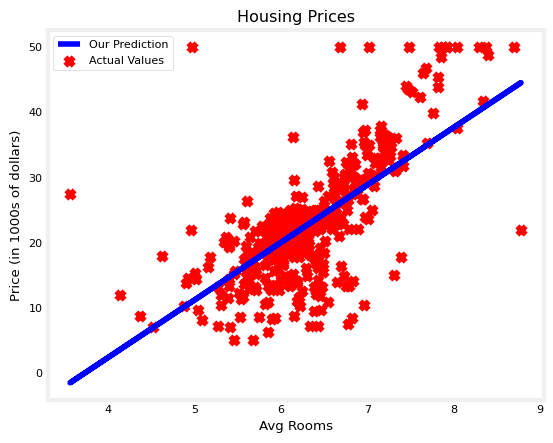

In [21]:
import numpy as np

tmp_f_wb = compute_model_output(x_train, w, b)

# Plot our model prediction
plt.plot(x_train, tmp_f_wb, c='b',label='Our Prediction')

# Plot the data points
plt.scatter(x_train, y_train, marker='x', c='r',label='Actual Values')

# Set the title
plt.title("Housing Prices")
# Set the y-axis label
plt.ylabel('Price (in 1000s of dollars)')
# Set the x-axis label
plt.xlabel('Avg Rooms')
plt.legend()
plt.show()

In [18]:
import math

# Function to calculate the cost
def compute_cost(x, y, w, b):
    m = x.shape[0]
    cost = 0

    for i in range(m):
        f_wb = w * x.iloc[i] + b
        cost += (f_wb - y.iloc[i])**2

    total_cost = 1 / (2 * m) * cost
    return total_cost

# Function to calculate gradients
def compute_gradient(x, y, w, b):
    m = x.shape[0]
    dj_dw = 0
    dj_db = 0

    for i in range(m):
        f_wb = w * x.iloc[i] + b
        dj_dw += (f_wb - y.iloc[i]) * x.iloc[i]
        dj_db += (f_wb - y.iloc[i])

    dj_dw /= m
    dj_db /= m

    return dj_dw, dj_db

# Gradient descent function
def gradient_descent(x, y, w_in, b_in, alpha, num_iters, cost_function, gradient_function):
    J_history = []
    p_history = []
    b = b_in
    w = w_in

    for i in range(num_iters):
        dj_dw, dj_db = gradient_function(x, y, w, b)
        b = b - alpha * dj_db
        w = w - alpha * dj_dw

        if i < 100000:  # prevent memory issues
            J_history.append(cost_function(x, y, w, b))
            p_history.append([w, b])

        if i % math.ceil(num_iters / 10) == 0:
            print(f"Iteration {i:4}: Cost {J_history[-1]:0.2e} ",
                  f"dj_dw: {dj_dw: 0.3e}, dj_db: {dj_db: 0.3e}  ",
                  f"w: {w: 0.3e}, b:{b: 0.5e}")

    return w, b, J_history, p_history

# Example usage
w_init = 0
b_init = 0
iterations = 10000
tmp_alpha = 1.0e-2

w_final, b_final, J_hist, p_hist = gradient_descent(
    x_train, y_train, w_init, b_init, tmp_alpha,
    iterations, compute_cost, compute_gradient)

print(f"(w,b) found by gradient descent: ({w_final:8.4f},{b_final:8.4f})")


Iteration    0: Cost 1.23e+02  dj_dw: -1.470e+02, dj_db: -2.261e+01   w:  1.470e+00, b: 2.26119e-01
Iteration 1000: Cost 2.79e+01  dj_dw: -6.041e-02, dj_db:  3.852e-01   w:  4.209e+00, b:-3.53034e+00
Iteration 2000: Cost 2.66e+01  dj_dw: -5.374e-02, dj_db:  3.427e-01   w:  4.780e+00, b:-7.16518e+00
Iteration 3000: Cost 2.55e+01  dj_dw: -4.781e-02, dj_db:  3.049e-01   w:  5.287e+00, b:-1.03990e+01
Iteration 4000: Cost 2.46e+01  dj_dw: -4.254e-02, dj_db:  2.712e-01   w:  5.738e+00, b:-1.32760e+01
Iteration 5000: Cost 2.40e+01  dj_dw: -3.784e-02, dj_db:  2.413e-01   w:  6.139e+00, b:-1.58357e+01
Iteration 6000: Cost 2.34e+01  dj_dw: -3.367e-02, dj_db:  2.147e-01   w:  6.496e+00, b:-1.81129e+01
Iteration 7000: Cost 2.30e+01  dj_dw: -2.995e-02, dj_db:  1.910e-01   w:  6.814e+00, b:-2.01389e+01
Iteration 8000: Cost 2.27e+01  dj_dw: -2.665e-02, dj_db:  1.699e-01   w:  7.097e+00, b:-2.19413e+01
Iteration 9000: Cost 2.24e+01  dj_dw: -2.371e-02, dj_db:  1.512e-01   w:  7.348e+00, b:-2.35449e+01


In [22]:
print(f"1000 sqft house prediction {w_final*6.575 + b_final:0.1f} Thousand dollars")
print(f"1200 sqft house prediction {w_final*7.185 + b_final:0.1f} Thousand dollars")
print(f"2000 sqft house prediction {w_final*6.9 + b_final:0.1f} Thousand dollars")

1000 sqft house prediction 24.8 Thousand dollars
1200 sqft house prediction 29.4 Thousand dollars
2000 sqft house prediction 27.3 Thousand dollars
